In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imagePath = '117_3_4.png'
img = cv2.imread(imagePath)

In [3]:
img_new = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:

gaussian = cv2.GaussianBlur(grey, (3,3), 0, 0, cv2.BORDER_DEFAULT)
median = cv2.medianBlur(gaussian, 5)


In [5]:
x = cv2.Sobel(median, cv2.CV_32F, 1, 0, ksize =3)
y = cv2.Sobel(median, cv2.CV_32F, 0, 1, ksize =3)
gradient = cv2.subtract(x,y)
sobel = cv2.convertScaleAbs(gradient)
#cv2.imshow('result', sobel)
#cv2.waitKey(0)

In [6]:
blurred = cv2.GaussianBlur(sobel, (9,9), 0)
ret, Binary = cv2.threshold(blurred, 80, 255, cv2.THRESH_BINARY)
#cv2.imshow('dilation', Binary)
#cv2.waitKey(0)

In [7]:
element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (9,1))
element2 = cv2.getStructuringElement(cv2.MORPH_RECT, (9,7))

Dilation = cv2.dilate(Binary, element2, iterations=1)
Erosion = cv2.erode(Dilation, element1, iterations=1)
Dilation2 = cv2.dilate(Erosion, element2, iterations=3)
#cv2.imshow('mophy', Dilation2)
#cv2.waitKey()

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25,25))
closed = cv2.morphologyEx(Binary, cv2.MORPH_CLOSE, kernel)
closed = cv2.erode(closed, None, iterations = 1)
closed = cv2.dilate(closed, None, iterations = 1)
#cv2.imshow('erode dilate', closed)
#cv2.waitKey()

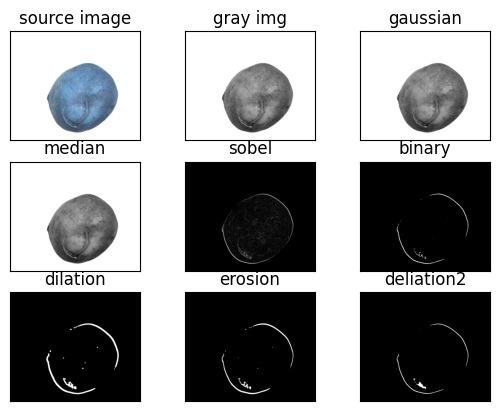

In [9]:
titles = ['source image', 'gray img', 'gaussian','median','sobel','binary','dilation','erosion','deliation2']
images = [img, grey, gaussian, median, sobel, Binary, Dilation, Erosion, closed]

for i in range(9):
    plt.subplot(3,3,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]) , plt.yticks([]) 
plt.savefig('saved.png')
plt.show()  

In [10]:
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

c= sorted(cnts, key=cv2.contourArea, reverse= True)

print (c)

[array([[[364, 583]],

       [[364, 590]],

       [[363, 591]],

       ...,

       [[366, 589]],

       [[367, 588]],

       [[367, 583]]], dtype=int32), array([[[728, 299]],

       [[727, 300]],

       [[716, 300]],

       ...,

       [[758, 300]],

       [[750, 300]],

       [[749, 299]]], dtype=int32), array([[[560, 849]],

       [[557, 852]],

       [[556, 852]],

       [[556, 861]],

       [[555, 862]],

       [[555, 863]],

       [[554, 864]],

       [[554, 865]],

       [[550, 869]],

       [[549, 869]],

       [[548, 870]],

       [[544, 870]],

       [[543, 871]],

       [[542, 870]],

       [[538, 870]],

       [[537, 869]],

       [[536, 869]],

       [[530, 863]],

       [[528, 863]],

       [[528, 865]],

       [[531, 868]],

       [[531, 869]],

       [[532, 870]],

       [[532, 871]],

       [[533, 872]],

       [[534, 872]],

       [[535, 873]],

       [[538, 873]],

       [[539, 874]],

       [[540, 874]],

       [[541, 875]],


In [11]:
rect = cv2.minAreaRect(c[0])
print('rect', rect)

rect ((517.48095703125, 822.0732421875), (538.0203247070312, 186.4517822265625), 38.542606353759766)


In [12]:
Box = np.intp(cv2.boxPoints(rect))
print('box', Box)

box [[ 248  727]
 [ 365  581]
 [ 785  916]
 [ 669 1062]]


In [13]:
#Final_img = cv2.drawContours(img.copy(), [Box], -1, (0,0,255), 3)
Final_img = cv2.drawContours(img.copy(), c, -1, (0,0,255), 3)
cv2.imshow('final img', Final_img)
cv2.waitKey()
cv2.imwrite('final.png', Final_img)

True